<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic18/2_Grokking_DL_hfst4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

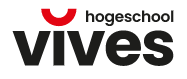<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# CHAPTER 4: INTRO TO NEURAL LEARNING - GRADIENT DESCENT

Hoofstuk 4 (pag 47-77) uit het boek "grokking Deep Learning" van Andrew W. Trask.

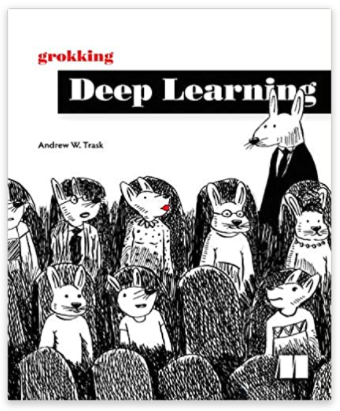

## Compare: does your network make good predictions?

boek pag 50 ev

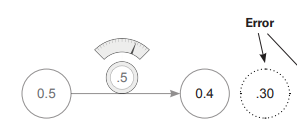

We gebruiken de Mean Squared Error (MSE) als loss function:

> MSE $= \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

met $n$ het aantal datapunten, $y_i$ het label van punt $i$ en $\hat{y}_i$ de voorspelling van punt $i$. De Python code is uiteraard eenvoudiger te begrijpen:

> `MSE = sum([(y[i] - yp[i])**2 for i in range(n)]) / n`

met `yp` de array met `n` voorspellingen.

Merk op dat we bij 1 datapunt ($n = 1$) de 'squared error' van dat punt krijgen.

In [ ]:
# de squared error voor 1 datapunt

weight = 0.5                      # gewicht
input = 0.5                       # 1 feature
goal = 0.8                        # label of target
prediction = input * weight       # voorspelling
print('prediction:', prediction)
error = (prediction - goal) ** 2  # squared error
print('squared error:', error)

prediction: 0.25
squared error: 0.30250000000000005


**Opdracht**: Bereken ook de 'absolute error'.

In [ ]:
print('absolute error:', abs(prediction - goal))

absolute error: 0.55


## What's the simplest form of neural learning?

boek pag 52 ev

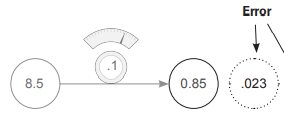

Ons model is hier gelijk aan:

> $y = wx$

met $y$ de voorspelling, $w$ het gewicht en $x$ de feature van 1 datapunt.

In [ ]:
def neural_network(input, weight):
    prediction = input * weight
    return prediction

def squared_error(goal, prediction):
    error = (prediction - goal) ** 2
    return error

In [ ]:
number_of_toes = [8.5, 9.5, 10, 9]
labels = [1, 1, 0, 1]  # binair: 1 = overwinning, 0 = verlies

prediction = neural_network(number_of_toes[0], weight=0.1)
error = squared_error(labels[0], prediction)
print('error:', error)

error: 0.022499999999999975


Gewicht (weight) groter en kleiner maken en kijken of de fout (squared error) vergroot of verkleint.

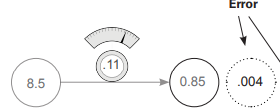

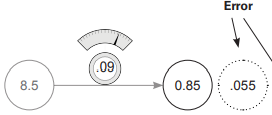

In [ ]:
step = 0.01
weight = 0.1

prediction_up = neural_network(number_of_toes[0], weight + step)
error_up = squared_error(labels[0], prediction_up)
print('error up:', error_up)

prediction_down = neural_network(number_of_toes[0], weight - step)
error_down = squared_error(labels[0], prediction_down)
print('error down:', error_down)

error up: 0.004224999999999993
error down: 0.05522499999999994


We nemen het gewicht met de kleinere fout, d.i. `weight + step`



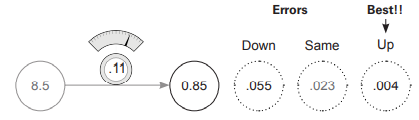

In [ ]:
# enkel nieuw gewicht nemen als één van de nieuwe fouten effectief kleiner is!
if error > error_up or error > error_down:
    # neem de kleinste fout
    if error_down < error_up:
        weight -= step
    if error_up < error_down:
        weight += step
print('new weight:', weight)

new weight: 0.11


Dit is één iteratie van 'hot and cold' learning.

## Hot and cold learning

boek pag 54 ev

Vergelijk met het raadspelletje 'Warm of Koud'

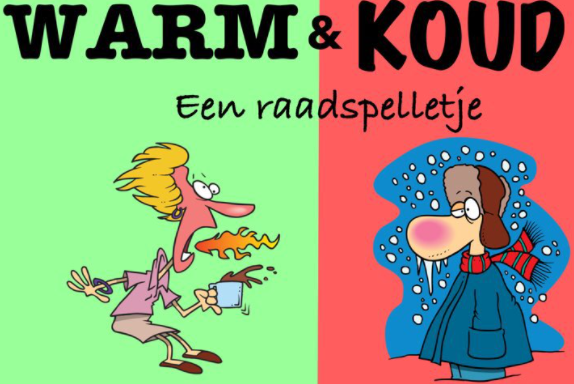

We implementeren nu meerdere iteraties van 'hot and cold' learning

In [ ]:
def hot_cold_learning(input, weight, goal, step, iterations):
    for iteration in range(iterations):
        prediction = neural_network(input, weight)
        error = squared_error(goal, prediction)
        error_up = squared_error(goal, neural_network(input, weight + step))
        error_down = squared_error(goal, neural_network(input, weight - step))
        if error > error_up or error > error_down:
            if error_down < error_up:
                weight -= step
            elif error_down > error_up:
                weight += step
    return weight

In [ ]:
weight = 0.5
input = 0.5
goal = 0.8
step = 0.001

weight = hot_cold_learning(input, weight, goal, step, iterations=1101)
neural_network(input, weight)

0.7999999999999672

**Opdracht**: Implementeer een klasse `HotColdLearner` voor het algoritme dat door de functie `hot_cold_learning` wordt uitgevoerd. Definieer de verschillende parameters van die functie als attributen in die klasse. Neem in die klasse ook de functies `neural_network` en `squared_error` op als (private) methode. Voeg tenslotte ook (een) methode(s) toe om de evolutie van `weight`, `prediction` en/of `error` te plotten als functie van het aantal iteraties. Maak hiervoor gebruik van `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt

class HotColdLearner:

    def __init__(self, input, weight, goal, step, iterations):
        self.input = input
        self.weight = weight
        self.goal = goal
        self.step = step
        self.iterations = iterations
        self.weights = []
        self.errors = []
        self.predictions = []

    @staticmethod
    def __neural_network(input, weight):
        return input * weight

    def __squared_error(self, prediction):
        return (prediction - self.goal) ** 2

    def learn(self):
        self.weights.append(self.weight)
        for iteration in range(self.iterations):
            weight = self.weights[-1]
            prediction = self.__neural_network(self.input, weight)
            error = self.__squared_error(prediction)
            error_up = self.__squared_error(self.__neural_network(self.input, weight + self.step))
            error_down = self.__squared_error(self.__neural_network(self.input, weight - self.step))
            if error > error_up or error > error_down:
                if error_down < error_up:
                    weight -= self.step
                elif error_down > error_up:
                    weight += self.step
            self.weights.append(weight)
            self.predictions.append(prediction)
            self.errors.append(error)

    def plot(self, what='predictions'):
        y = getattr(self, what)
        plt.plot(y)
        plt.xlabel('iterations')
        plt.ylabel(what)

Test de klasse uit met het voorbeeld die we hierboven hebben uigevoerd:

```
weight = 0.5
input = 0.5
goal = 0.8
step = 0.001
iterations = 1101
```
Plot de predictions in functie van het aantal iteraties.

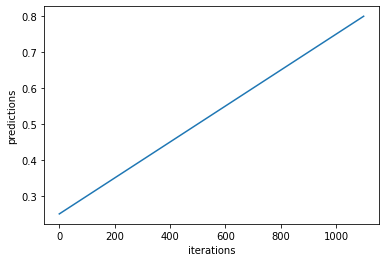

In [ ]:
hcl = HotColdLearner(0.5, 0.5, 0.8, 0.001, 1101)
hcl.learn()
hcl.plot('predictions')

Neem nu `step = 0.2`. Plot opnieuw de predicties. Het volstaat om 50 iteraties te nemen.

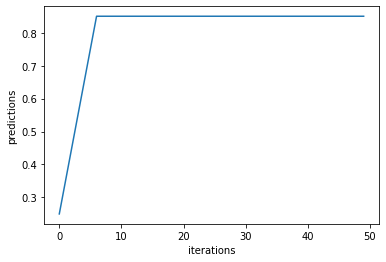

In [ ]:
hcl = HotColdLearner(0.5, 0.5, 0.8, 0.2, 50)
hcl.learn()
hcl.plot('predictions')

Neem tenslotte `step = 10` en plot de predicties. Ook hier volstaan 50 iteraties.

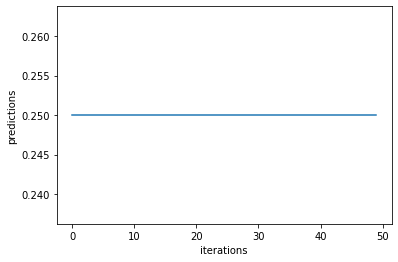

In [ ]:
hcl = HotColdLearner(0.5, 0.5, 0.8, 10, 50)
hcl.learn()
hcl.plot('predictions')

Besluit: we moeten een betere manier vinden om ons gewicht te optimaliseren!

## Calculating both direction and amount from error

boek pag 56 ev

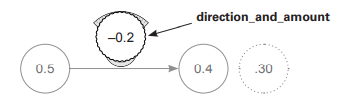

Met onderstaande functie kunnen we met 1 lijn code zowel de stap als de richting (positief of negatief) berekenen waarmee we het gewicht moeten aanpassen. Dit noemen we **Gradient Descent**. In de cursus ML spraken we van de 'linear regression trick', de 'perceptron trick', enz.

In [ ]:
def direction_and_amount(input, weight, goal, iterations):
    for iteration in range(iterations):
        prediction = neural_network(input, weight)
        error = squared_error(goal, prediction)
        direction_and_amount = (prediction - goal) * input  # stap + richting berekenen
        weight -= direction_and_amount  # gewicht aanpassen
    return weight

In [ ]:
weight = 0.5
goal = 0.8
input = 0.5

weight = direction_and_amount(input, weight, goal, iterations=20)
neural_network(input, weight)

0.7982558334335863

## One iteration of gradient descent

boek pag 58 ev

We nemen wat gas terug en beginnen met 1 iteratie van Gradient Descent te implementeren. In dit geval voegen we er ook nog de **learning rate** aan toe, een hyperparameter die de stap kleiner en groter maakt.

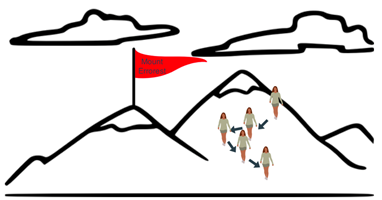

Herinner je dat we Gradient Descent hebben vergeleken met het afdalen van een berg (Mount Errorest) naar het laagste punt. De berg is de loss functie en in het laagste punt is de totale fout het kleinst. Daar hebben we dus de beste fit van onze data. Tijdens het afdalen mogen we echter geen te kleine stappen nemen omdat we dan te traag dalen, maar ook geen te grote stappen, omdat we dan het laagste punt kunnen missen. Met de learning rate kunnen we dat regelen.

In [ ]:
def gradient_descent(input, weight, goal, alpha):  # alpha is de learning rate
    prediction = neural_network(input, weight)
    error = squared_error(goal, prediction)
    delta = prediction - goal
    weight_delta = input * delta  # gradient = direction_and_amount!
    weight -= weight_delta * alpha  # de stap (weight_delta) herschalen adhv de learning rate alpha
    return weight

In [ ]:
weight = 0.1
alpha = 0.01  # learning rate!

number_of_toes = [8.5, 9.5, 10, 9]
labels = [1, 1, 0, 1]  # binair: 1 = overwinning, 0 = verlies

gradient_descent(number_of_toes[0], weight, labels[0], alpha)

0.11275

## Learning is just reducing error

boek pag 60 ev

"Leren" komt in dit geval dus neer op de (totale) fout minimaliseren. In ons eenvoudige neuraal netwerk met slechts 1 gewicht (=parameter) kunnen we dat voorstellen in een 2D assenstelsel: op de x-as zie je het gewicht $w$, op de y-as de overeenkomstige fout (squared error). De fout is dus een functie van het gewicht en is in dit eenvoudige voorbeeld een parabool.

De fout is het kleinst in het laagste punt van die parabool. Om in dat laagste punt te komen vanuit om het even welk ander punt, moeten we de helling van de parabool afgaan. De grootte van die helling wordt gegeven door de richtingscoëfficiënt van de raaklijn in dat punt. Die rico is gelijk aan de afgeleide van de parabool. In N dimensies spreekt men van de gradiënt. Vandaar de naam Gradient Descent.

De functie hieronder plot deze parabool voor ons eenvoudig neuraal netwerk en 1 datapunt (`input`, `goal`). Ook de raaklijn wordt geplot voor het gegeven gewicht (`weight`) en de helling (slope) van deze raaklijn wordt weergegeven. Deze helling is dus de afgeleide of gradiënt van de error-functie voor het gegeven gewicht.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_function(input, goal, weight, weight_limits=[-10, 14], slope_limits=[-1, 1], axes=None):

    # check axes
    if axes is None:
        _, axes = plt.subplots()

    # error function
    weights = np.linspace(weight_limits[0], weight_limits[1], 100)
    predictions = input * weights
    errors = np.square(predictions - goal)
    axes.plot(weights, errors, 'k-');

    # minimum error: gradient = 0, and in this case, error = 0
    min_weight = goal / input
    axes.plot(min_weight, 0, 'ro', markersize=10);

    # (weight, error) point
    prediction = input * weight
    error = np.square(prediction - goal)
    axes.plot(weight, error, 'ko', markersize=10);

    # tangent (slope)
    gradient = 2 * (input * weight - goal) * input
    y = lambda x: error + gradient * (x - weight)
    x = weight + np.array(slope_limits)
    axes.plot(x, y(x), 'k:');

    # labels
    axes.set_xlabel('weight')
    axes.set_ylabel('error')
    axes.set_title(f"slope = {gradient:.2f}")

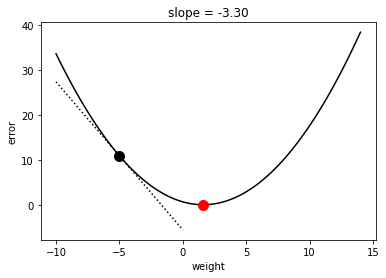

In [ ]:
input = 0.5
goal = 0.8
weight = -5

plot_error_function(input, goal, weight, slope_limits=[-5, 5])

## Let's watch several steps of learning

boek pag 62 ev

**Opdracht**: voer 4 iteraties "gradient descent" uit gebruik makend van de gelijknamige functie en plot telkens de errorfunctie en de huidige raaklijn. Start met volgende inputwaarden:
```
weight = 0.0
goal = 0.8
input = 1.1
alpha = 1
```
Tip: de 5 plots (vergeet de plot niet met de startwaarden) kan je in 1 figuur plotten m.b.v. de function `matplotlib.pyplot.subplots`.

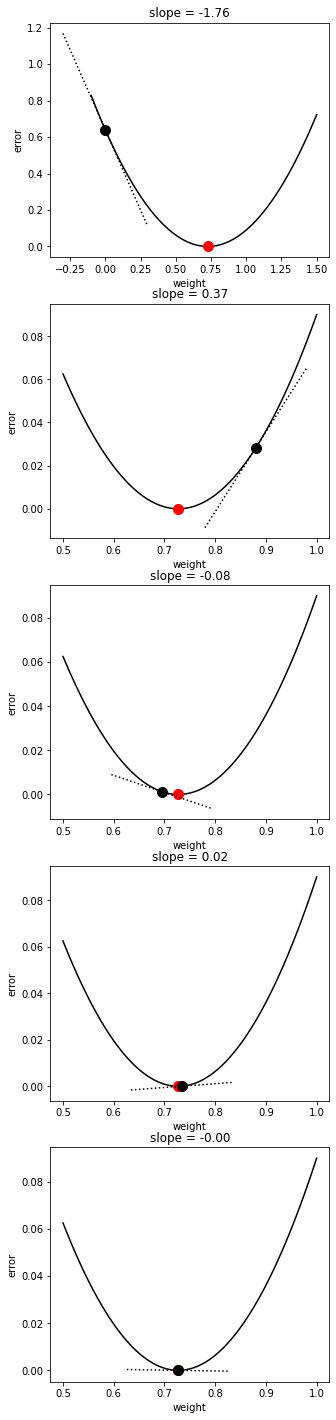

In [ ]:
weight = 0.0
goal = 0.8
input = 1.1
alpha = 1

fig, axes = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(25)

plot_error_function(input, goal, weight, weight_limits=[-0.1, 1.5], slope_limits=[-0.3, 0.3], axes=axes[0])
for i in range(1, 5):
    weight = gradient_descent(input, weight, goal, alpha)
    plot_error_function(input, goal, weight, weight_limits=[0.5, 1], slope_limits=[-0.1, 0.1], axes=axes[i])

Uitleg: Door het gewicht aan te passen adhv de gradiënt (in 2D is dat dus de afgeleide), komen we steeds dichter bij het minimum. De gradiënt is dus de helling (of rico) van de raaklijn in een gegeven punt. In het minimum is die raaklijn horizontaal en daarom is de afgeleide er nul omdat de helling van een horizontale raaklijn nul is. Een horizontale lijn stijgt niet en daalt ook niet, en heeft dus inderdaad geen helling.

## Why does it work? What is weight_delta, really?

boek pag 64 ev

Het eenvoudige neurale netwerk dat we hier bestuderen berekent een voorspelling als volgt:

`prediction = input * weight`

De fout die we maken berekenen we als volgt:

`error = (prediction - goal) ** 2`

Het verschil tussen voorspelling en target is:

`delta = prediction - goal = input * weight - goal`

We kunnen dus schrijven dat:

`error = delta ** 2`

De errorfunctie afleiden naar `weight` vinden we door de *kettingregel* toe te passen:

- eerst nemen we de afgeleide van `error` naar `delta` en dat is `2 * delta`
- dan nemen we de afgeleide van `delta` naar `weight` en dat is `input`.
- tenslotte moeten we beide afgeleiden met elkaar vermenigvuldigen en krijgen we:

`gradient = 2 * delta * input`

In twee dimensies is de gradiënt de richtingscoëfficiënt (of helling) van de raaklijn aan de errorfunctie in het punt `(weight, error)`.

Als we dichter bij het minimum van de errorfunctie willen komen (het laagste punt), dan moeten we de helling afdalen (vandaar "gradient descent"). Er zijn twee mogelijkheden:
- Als de helling van de raaklijn positief is, dan zitten we rechts van het minimum, en moeten we `weight` kleiner maken.
- Als de helling negatief is, dan zitten we links van het minimum en moeten `weight` groter maken.

We merken ook op dat hoe steiler/groter de helling is, hoe groter de stap die we moeten zetten. We kunnen dus gewoon `gradient` aftrekken van `weight` om dichter van het minimum te komen:

`weight -= gradient`

Aangezien we `gradient` met constante `alpha` vermenigvuldingen, de *learning rate*, kunnen we `gradient` door 2 delen en krijgen we:

`weight -= delta * input`

Om het wiskundig correct te houden zie je soms dat men om die reden `error` door 2 deelt waardoor de 2 in de afgeleide automatisch wegvalt.

## Breaking gradient descent

boek pag 72 ev

**Opdracht**: Gebruik je code uit vorige opdracht om opnieuw 4 iteraties "gradient descent" uit te voeren en het resultaat te plotten, maar start nu met volgende inputwaarden:
```
weight = 0.5
goal = 0.8
input = 2
alpha = 1
```

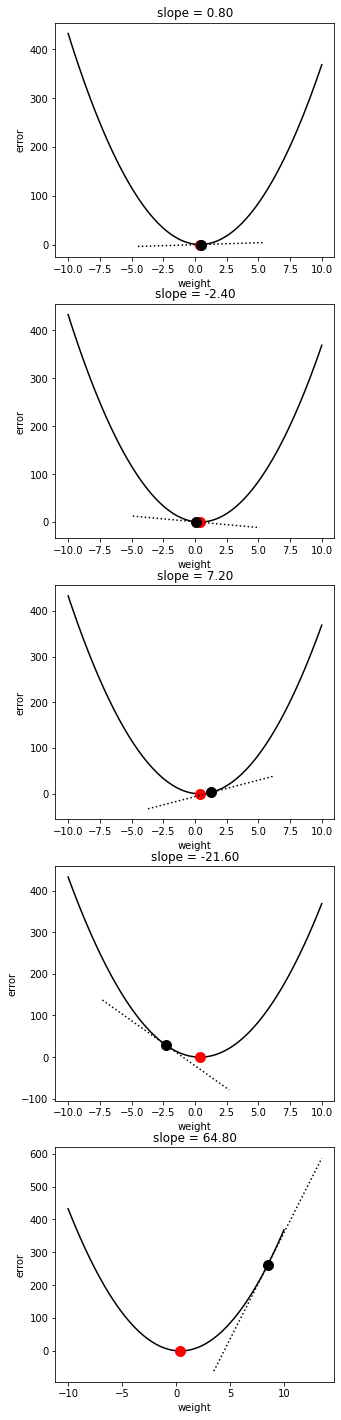

In [ ]:
weight = 0.5
goal = 0.8
input = 2
alpha = 1

fig, axes = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(25)

plot_error_function(input, goal, weight, weight_limits=[-10, 10], slope_limits=[-5, 5], axes=axes[0])
for i in range(1, 5):
    weight = gradient_descent(input, weight, goal, alpha)
    plot_error_function(input, goal, weight, weight_limits=[-10, 10], slope_limits=[-5, 5], axes=axes[i])

Uitleg: in dit geval convergeert het algoritme niet naar het minumum. Er treedt **divergentie** op i.p.v. **convergentie**. We noemen dit ook overshooting omdat het nieuwe punt telkens het minimum voorbij schiet en steeds verder ervan verwijderd raakt. Onze stappen zijn dus te groot. We lossen dit op door de stappen te verkleinen m.b.v. learning rate `alpha`.

## Introducing alpha

boek pag 75 ev

**Opdracht:** Voer nu dezelfde code uit als in vorige opdracht, maar nu met learning rate `alpha = 0.2`. Krijg je nu nog **overshooting**?

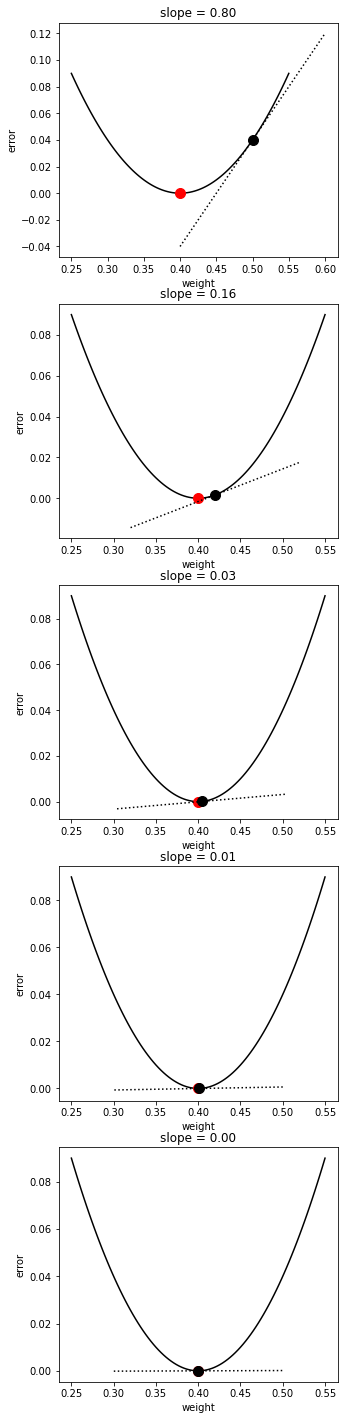

In [ ]:
weight = 0.5
goal = 0.8
input = 2
alpha = 0.2

fig, axes = plt.subplots(5, 1)
fig.set_figwidth(5)
fig.set_figheight(25)

plot_error_function(input, goal, weight, weight_limits=[0.25, 0.55], slope_limits=[-0.1, 0.1], axes=axes[0])
for i in range(1, 5):
    weight = gradient_descent(input, weight, goal, alpha)
    plot_error_function(input, goal, weight, weight_limits=[0.25, 0.55], slope_limits=[-0.1, 0.1], axes=axes[i])

**Besluit**: Door een kleinere learning rate te nemen verkleinen we de stappen en slagen we erin Gradient Descent te laten convergeren. De learning rate is een belangrijke hyperparameter die door de gebruiker moet opgegeven worden. De optimale waarde voor de learning rate hangt af van het probleem en moet via trial and error gefinetuned worden.

---